In [4]:
import intake
import xarray as xr
import matplotlib.pyplot as plt

In [5]:
models = [
    {
        "name": "ocsvm-tq-gamma-1_79-nu-1e-4",
        "diags_url": "gs://vcm-ml-experiments/claytons/2022-07-20/tq-combined-nd-trial-2/trained_models/ocsvm/diags_novelty_offline/ccf08e12d6956ee2c0e922194eb95051/"
    },
    {
        "name": "ocsvm-tq-gamma-2_79-nu-1e-4",
        "diags_url": "gs://vcm-ml-experiments/claytons/2022-08-09/tq-combined-nd-trial-1/trained_models/ocsvm-large-gamma/diags_novelty_offline/ccf08e12d6956ee2c0e922194eb95051/"
    },
    {
        "name": "ocsvm-tq-gamma-4_79-nu-1e-4",
        "diags_url": "gs://vcm-ml-experiments/claytons/2022-08-09/tq-combined-nd-trial-1/trained_models/ocsvm-larger-gamma/diags_novelty_offline/ccf08e12d6956ee2c0e922194eb95051/"
    },
    {
        "name": "ocsvm-tq-gamma-1_79-nu-5e-3",
        "diags_url": "gs://vcm-ml-experiments/claytons/2023-02-08/tq-additional-ocsvms-trial-2/trained_models/ocsvm-tq-gamma-1_79-nu-5e-3/diags_novelty_offline/ccf08e12d6956ee2c0e922194eb95051/"
    },
    {
        "name": "ocsvm-tq-gamma-2_79-nu-5e-3",
        "diags_url": "gs://vcm-ml-experiments/claytons/2023-02-08/tq-additional-ocsvms-trial-2/trained_models/ocsvm-tq-gamma-2_79-nu-5e-3/diags_novelty_offline/ccf08e12d6956ee2c0e922194eb95051/"
    } 
]

In [7]:
diags = {}
for diags_ in models:
    diags[diags_['name']] = intake.open_zarr(diags_['diags_url']).to_dask()

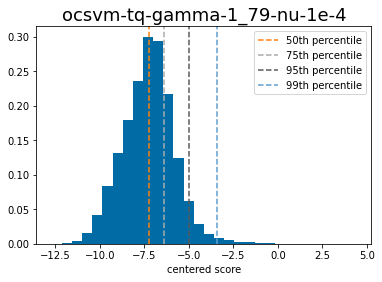

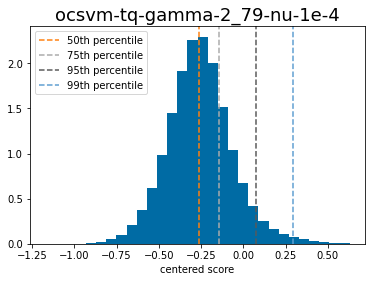

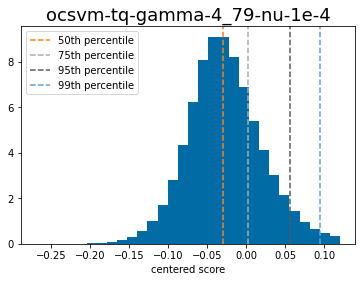

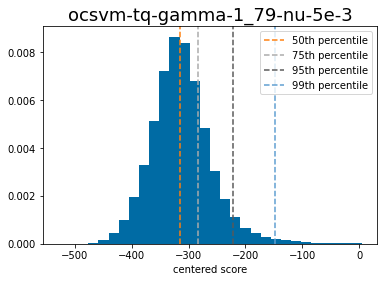

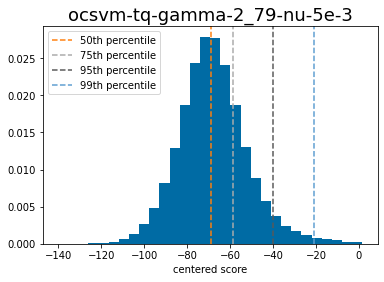

In [50]:
cutoffs_values = {}

for label, diags_ in diags.items():
    #diags_ = diags['ocsvm-tq-gamma-1_79-nu-1e-4']
    scores = diags_["centered_score"].stack(sample=list(diags_.dims)).values
    cutoffs = np.percentile(scores, 50), np.percentile(scores, 75), np.percentile(scores, 95), np.percentile(scores, 99)
    plt.hist(scores, density=True, bins=30)
    ylim = plt.gca().get_ylim()
    cutoffs_values[label]= {}
    for p, cutoff in zip([50, 75, 95, 99], cutoffs):
        cutoffs_values[label][p] = cutoff 
        plt.plot([cutoff, cutoff], ylim, '--', label=f"{p}th percentile")
    plt.ylim(ylim)
    plt.xlabel('centered score')
    plt.title(label, fontsize=18)
    plt.legend()
    plt.show()

In [51]:
cutoffs_values

{'ocsvm-tq-gamma-1_79-nu-1e-4': {50: -7.218873048022197,
  75: -6.372599287482776,
  95: -4.990137600774541,
  99: -3.403994897423271},
 'ocsvm-tq-gamma-2_79-nu-1e-4': {50: -0.26205313254393225,
  75: -0.14343512196859456,
  95: 0.07233499403751398,
  99: 0.2966208694001467},
 'ocsvm-tq-gamma-4_79-nu-1e-4': {50: -0.029850583020086682,
  75: 0.001679034380069104,
  95: 0.055424329177113624,
  99: 0.09498745937043893},
 'ocsvm-tq-gamma-1_79-nu-5e-3': {50: -315.7363149825659,
  75: -283.4996468068749,
  95: -221.60332550794874,
  99: -147.79858918975268},
 'ocsvm-tq-gamma-2_79-nu-5e-3': {50: -68.64619955860887,
  75: -58.717079361689734,
  95: -40.051143589287285,
  99: -20.72418722423168}}